## Load Data and Initial Grid Search

In [1]:
DATA_NAME = 'batch0approx1e5-agriVision-fourier-gray' # size-name-transform-channel

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
RERUN = False
CWD

'/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/results/case-studies/agriVision/fourier/batch0approx1e5/gray'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [4]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))

GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # For quick testing purposes
group_total_samples

{2: 45000,
 3: 72000,
 4: 63000,
 5: 117000,
 6: 126000,
 7: 171000,
 8: 189000,
 9: 297000,
 10: 396000,
 11: 495000,
 12: 648000,
 13: 882000,
 14: 1134000,
 15: 1539000,
 16: 1953000,
 17: 2574000,
 18: 3456000,
 19: 4563000,
 20: 5967000,
 21: 8010000,
 22: 10395000,
 23: 13887000,
 24: 18297000,
 25: 24057000,
 26: 31968000,
 27: 42183000,
 28: 55764000,
 29: 73701000,
 30: 97326000}

In [5]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:818: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamm

(r,eta),cdf     r  eta  \
0  ((0.02, -1.4), <scipy.interpolate._fitpack2.In...  0.02 -1.4   
1  ((0.02, -1.3), <scipy.interpolate._fitpack2.In...  0.02 -1.3   
2  ((0.02, -1.2), <scipy.interpolate._fitpack2.In...  0.02 -1.2   
3  ((0.02, -1.1), <scipy.interpolate._fitpack2.In...  0.02 -1.1   
4  ((0.02, -1.0), <scipy.interpolate._fitpack2.In...  0.02 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  9.618487e+69   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.821735e+74   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.455488e+78   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.406735e+81   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  5.331443e+83   

       kurtosis  
0  1.391529e+25  
1  8.172634e+21  
2  4.131785e+19  
3  6.947275e+17  
4  2.562075e+16

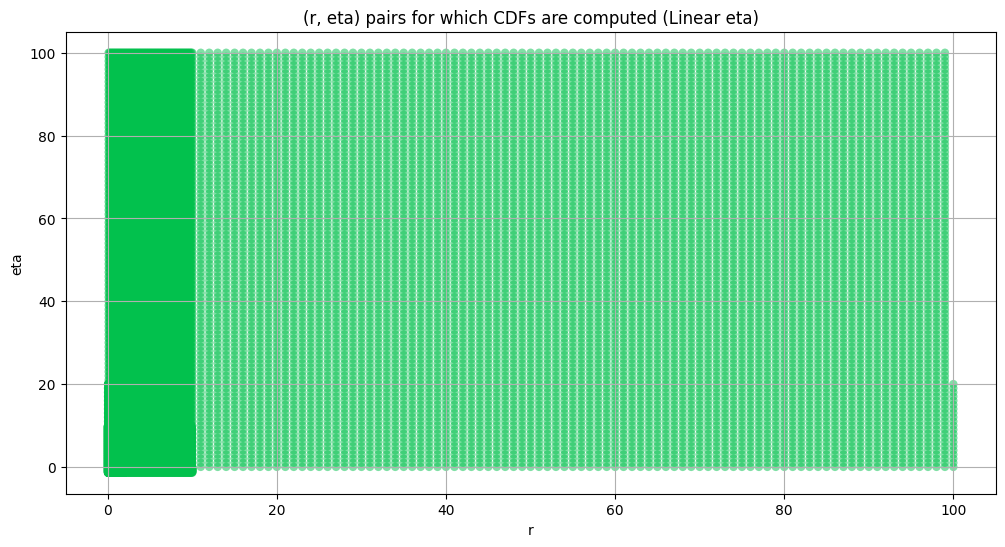

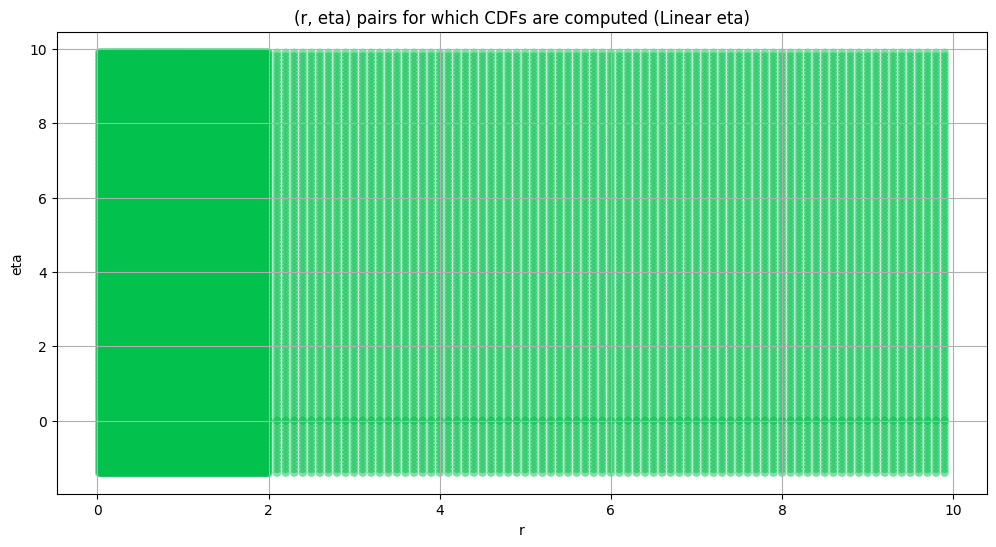

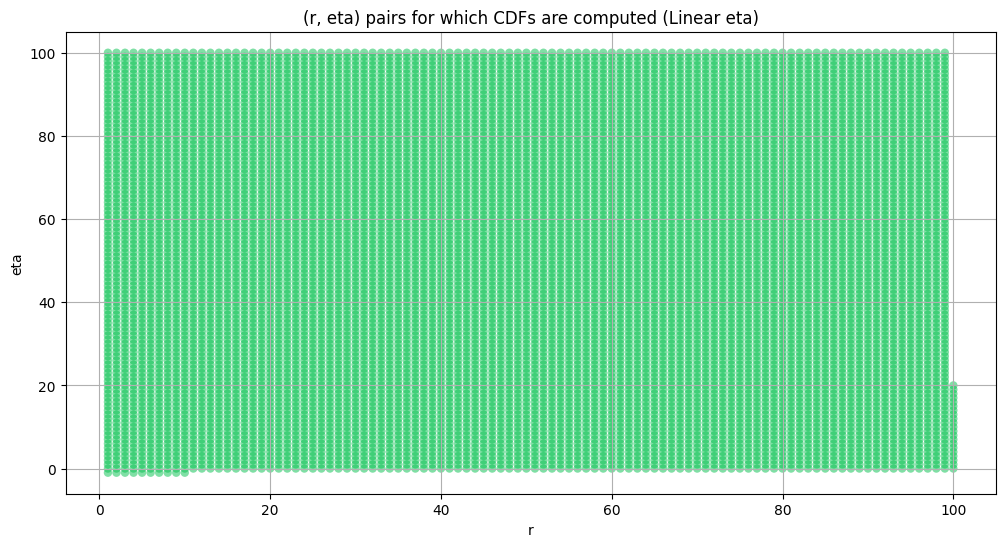

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


r           eta       variance      kurtosis
count  51883.000000  51883.000000   5.188300e+04  5.064200e+04
mean      11.990701     21.476312            inf           inf
std       22.639851     28.237512            inf           NaN
min        0.020000     -1.400000   0.000000e+00  4.787254e-04
25%        1.000000      3.000000   9.882555e-01  1.513901e-02
50%        1.970000      7.600000   1.482803e+00  1.950077e-01
75%        8.100000     32.000000   5.742021e+00  6.565170e-01
max      100.000000    100.000000  1.797693e+308           inf

In [6]:
create_scatter_plot(all_cdfs_df)
create_scatter_plot(all_cdfs_df[(all_cdfs_df['r'] < 10) & (all_cdfs_df['eta'] < 10)])
create_scatter_plot(coarse_cdf_df)

all_cdfs_df.describe()

In [7]:
n_bootstrap = int(1e5)
bootstrap_size = int(1e4)
ci = 0.99

In [8]:
var_kurt_df_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not var_kurt_df_path.exists():
    for group in  GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(var_kurt_df_path, index_col=GROUP)
var_kurt_df = pd.read_csv(var_kurt_df_path, index_col=GROUP)
master_df

Band 2


100%|██████████| 100000/100000 [00:51<00:00, 1954.89it/s]


Band 5


100%|██████████| 100000/100000 [00:45<00:00, 2213.27it/s]


Band 8


100%|██████████| 100000/100000 [00:45<00:00, 2209.95it/s]


Band 11


100%|██████████| 100000/100000 [00:44<00:00, 2225.80it/s]


Band 14


100%|██████████| 100000/100000 [00:44<00:00, 2233.85it/s]


Band 17


100%|██████████| 100000/100000 [00:44<00:00, 2234.71it/s]


Band 20


100%|██████████| 100000/100000 [00:44<00:00, 2233.62it/s]


Band 23


100%|██████████| 100000/100000 [00:45<00:00, 2185.31it/s]


Band 26


100%|██████████| 100000/100000 [00:45<00:00, 2210.74it/s]


Band 29


100%|██████████| 100000/100000 [00:45<00:00, 2206.46it/s]


obs_var     var_lower     var_upper      obs_kurt  kurt_lower  \
band                                                                       
2     2.585050e+08  1.589284e+08  4.078819e+08    356.081580   99.133301   
5     1.529785e+08  8.631151e+07  3.112992e+08    813.590600  103.779987   
8     5.121678e+07  3.003023e+07  9.583304e+07    612.806126   92.325802   
11    3.090617e+07  1.261454e+07  1.278531e+08   5769.238912   83.057897   
14    1.055680e+07  5.359151e+06  3.458284e+07   2610.082854   75.710781   
17    6.451851e+06  2.578068e+06  3.393683e+07  11181.922646   65.416463   
20    3.491903e+06  1.486023e+06  1.712062e+07   6724.626660   70.291564   
23    1.724653e+06  5.911003e+05  1.148686e+07  16738.589621   63.702858   
26    1.045736e+06  1.697875e+05  1.057092e+07  32596.103697   71.612461   
29    1.118847e+05  2.123627e+04  9.043177e+05  26453.194976   91.602449   

       kurt_upper  total_samples  
band                              
2      600.444001        45000.0  
5     2060.547926       117000.0  
8     1727.800649       189000.0  
11    6259.838704       495000.0  
14    4860.044055      1134000.0  
17    7685.503316      2574000.0  
20    6708.684204      5967000.0  
23    8285.556194     13887000.0  
26    9318.730708     31968000.0  
29    9072.576799     73701000.0

####
Band  2


100%|██████████| 51883/51883 [01:18<00:00, 660.67it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 45000, Without approximation : 45000.0


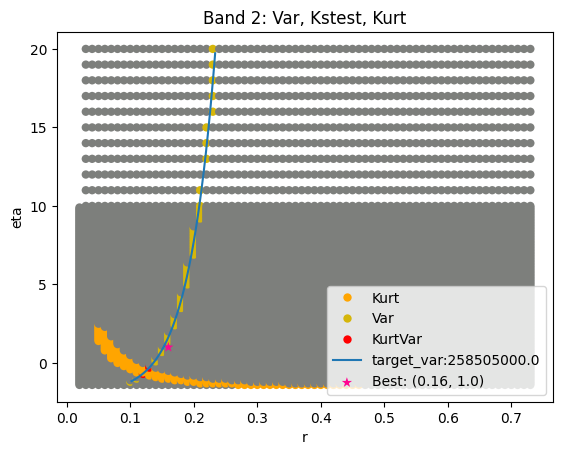

####
Band  5


100%|██████████| 51883/51883 [02:48<00:00, 308.29it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 117000.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


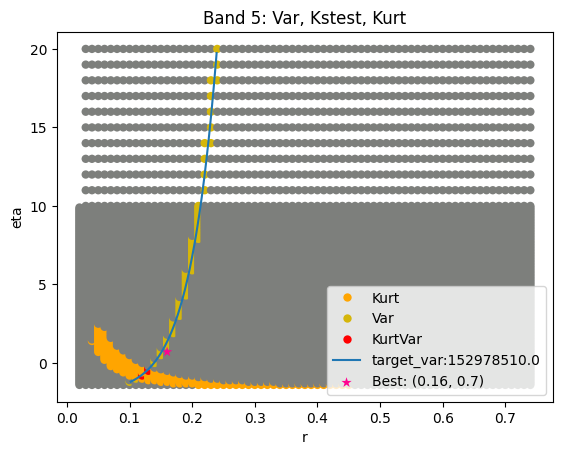

####
Band  8


100%|██████████| 51883/51883 [02:48<00:00, 307.45it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 189000.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


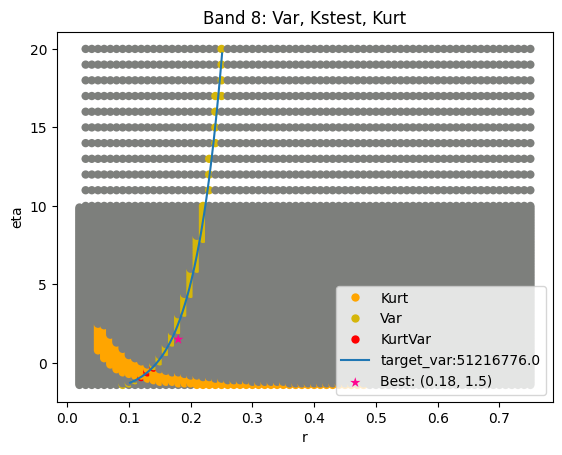

####
Band  11


100%|██████████| 51883/51883 [02:49<00:00, 306.20it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 495000.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


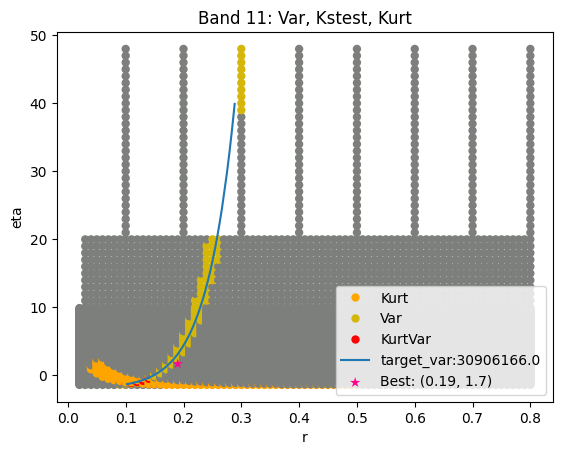

####
Band  14


100%|██████████| 51883/51883 [02:49<00:00, 305.70it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 1134000.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


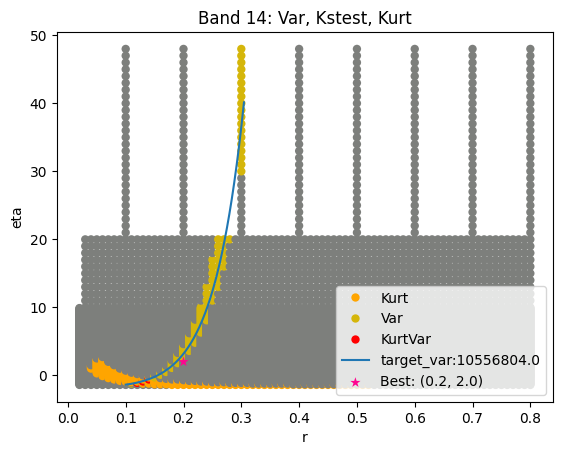

####
Band  17


100%|██████████| 51883/51883 [02:48<00:00, 308.11it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 2574000.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


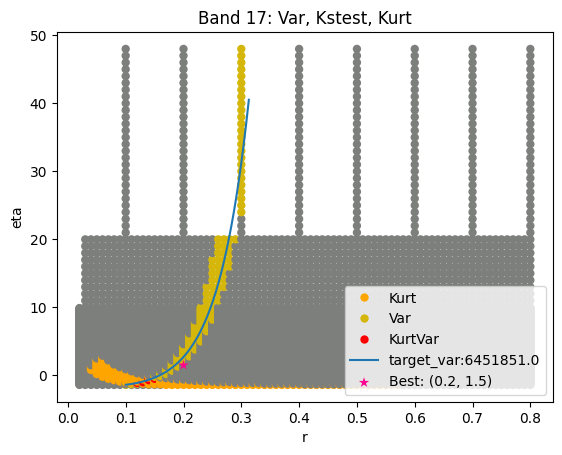

####
Band  20


100%|██████████| 51883/51883 [02:48<00:00, 308.70it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 5967000.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


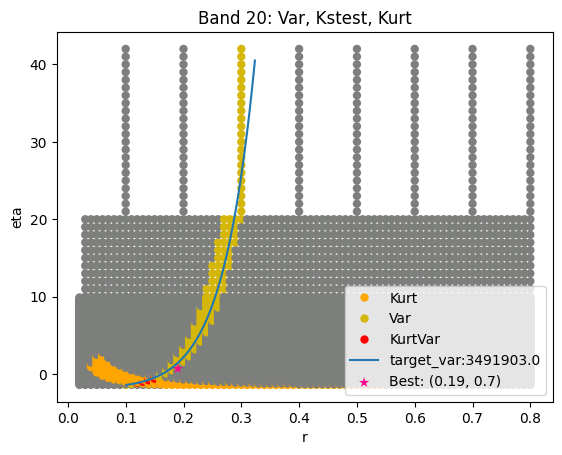

####
Band  23


100%|██████████| 51883/51883 [02:48<00:00, 307.75it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 13887000.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


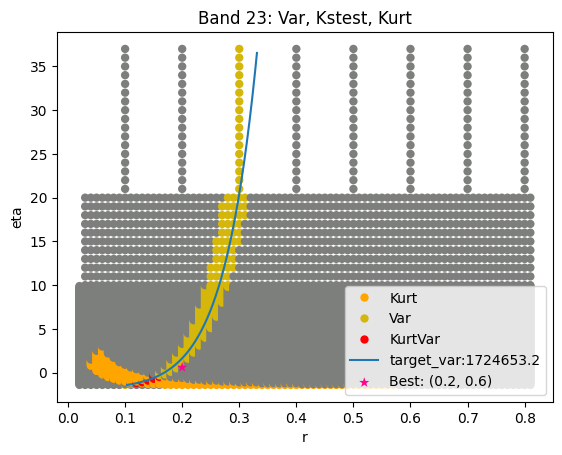

####
Band  26


100%|██████████| 51883/51883 [02:47<00:00, 309.51it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 31968000.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


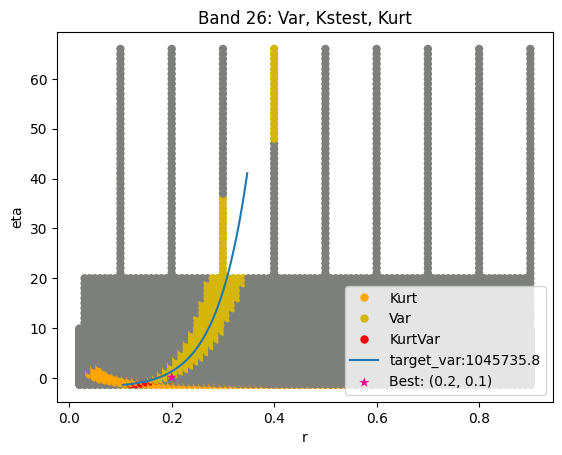

####
Band  29


100%|██████████| 51883/51883 [02:48<00:00, 308.49it/s]


Finding Minimum after computing 51883 CDFs
Number of samples: 100000, Without approximation : 73701000.0


/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


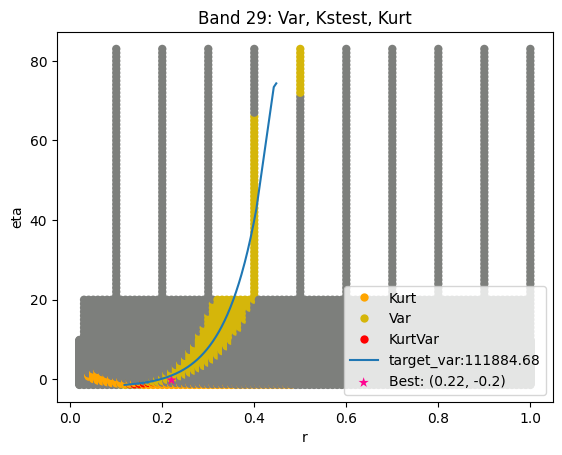

obs_var     var_lower     var_upper      obs_kurt  kurt_lower  \
band                                                                       
2     2.585050e+08  1.589284e+08  4.078819e+08    356.081580   99.133301   
5     1.529785e+08  8.631151e+07  3.112992e+08    813.590600  103.779987   
8     5.121678e+07  3.003023e+07  9.583304e+07    612.806126   92.325802   
11    3.090617e+07  1.261454e+07  1.278531e+08   5769.238912   83.057897   
14    1.055680e+07  5.359151e+06  3.458284e+07   2610.082854   75.710781   
17    6.451851e+06  2.578068e+06  3.393683e+07  11181.922646   65.416463   
20    3.491903e+06  1.486023e+06  1.712062e+07   6724.626660   70.291564   
23    1.724653e+06  5.911003e+05  1.148686e+07  16738.589621   63.702858   
26    1.045736e+06  1.697875e+05  1.057092e+07  32596.103697   71.612461   
29    1.118847e+05  2.123627e+04  9.043177e+05  26453.194976   91.602449   

       kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                            
2      600.444001        45000.0       0.16          1.0             0.010913   
5     2060.547926       117000.0       0.16          0.7             0.011256   
8     1727.800649       189000.0       0.18          1.5             0.008814   
11    6259.838704       495000.0       0.19          1.7             0.008397   
14    4860.044055      1134000.0       0.20          2.0             0.006294   
17    7685.503316      2574000.0       0.20          1.5             0.006467   
20    6708.684204      5967000.0       0.19          0.7             0.006697   
23    8285.556194     13887000.0       0.20          0.6             0.012452   
26    9318.730708     31968000.0       0.20          0.1             0.008531   
29    9072.576799     73701000.0       0.22         -0.2             0.013607   

      kstest_stat_cutoff_0.05  
band                           
2                    0.006398  
5                    0.003969  
8                    0.003123  
11                   0.001930  
14                   0.001275  
17                   0.000846  
20                   0.000556  
23                   0.000364  
26                   0.000240  
29                   0.000158

In [9]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
group_cdf_df_dict_path = Path(os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

if RERUN or not master_df_combo_path.exists() or not group_cdf_df_dict_path.exists():
    sorted_params = sorted(all_cdfs)
    group_cdf_df_dict = dict()

    for i, group in enumerate(GROUPS):
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        group_cdf_df = all_cdfs_df.copy()
        ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
        master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        master_df.loc[group, 'kstest_stat_initial'] = min_stat
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
        
        group_cdf_df_dict[group] = group_cdf_df
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = initial_param)
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

        # Optional: Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
    pd.to_pickle(group_cdf_df_dict, os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

group_cdf_df_dict = pd.read_pickle(group_cdf_df_dict_path)
master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
master_df

In [10]:
master_df_eta0_path = Path(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))
if not master_df_eta0_path.exists():
    best_params_eta0 = []
    for i, group in enumerate(GROUPS):
        if master_df.loc[group, 'initial_eta'] != 0:
            sample = group_data_map[group]
            group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
            cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
            ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
            best_params_eta0.append(best_param_eta0[0])
            master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
        else:
            master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
            best_params_eta0.append(master_df.loc[group, 'initial_r'])
    master_df['best_r_eta0'] = best_params_eta0
    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(master_df_eta0_path, index_col=GROUP)
master_df

100%|██████████| 369/369 [00:01<00:00, 226.94it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 304.67it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 306.37it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 305.17it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 295.90it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 266.54it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 304.74it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 304.98it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 294.59it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 304.79it/s]

Finding Minimum after computing 369 CDFs


obs_var     var_lower     var_upper      obs_kurt  kurt_lower  \
band                                                                       
2     2.585050e+08  1.589284e+08  4.078819e+08    356.081580   99.133301   
5     1.529785e+08  8.631151e+07  3.112992e+08    813.590600  103.779987   
8     5.121678e+07  3.003023e+07  9.583304e+07    612.806126   92.325802   
11    3.090617e+07  1.261454e+07  1.278531e+08   5769.238912   83.057897   
14    1.055680e+07  5.359151e+06  3.458284e+07   2610.082854   75.710781   
17    6.451851e+06  2.578068e+06  3.393683e+07  11181.922646   65.416463   
20    3.491903e+06  1.486023e+06  1.712062e+07   6724.626660   70.291564   
23    1.724653e+06  5.911003e+05  1.148686e+07  16738.589621   63.702858   
26    1.045736e+06  1.697875e+05  1.057092e+07  32596.103697   71.612461   
29    1.118847e+05  2.123627e+04  9.043177e+05  26453.194976   91.602449   

       kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                            
2      600.444001        45000.0       0.16          1.0             0.010913   
5     2060.547926       117000.0       0.16          0.7             0.011256   
8     1727.800649       189000.0       0.18          1.5             0.008814   
11    6259.838704       495000.0       0.19          1.7             0.008397   
14    4860.044055      1134000.0       0.20          2.0             0.006294   
17    7685.503316      2574000.0       0.20          1.5             0.006467   
20    6708.684204      5967000.0       0.19          0.7             0.006697   
23    8285.556194     13887000.0       0.20          0.6             0.012452   
26    9318.730708     31968000.0       0.20          0.1             0.008531   
29    9072.576799     73701000.0       0.22         -0.2             0.013607   

      kstest_stat_cutoff_0.05  kstest_stat_eta0  best_r_eta0  
band                                                          
2                    0.006398          0.044432         0.14  
5                    0.003969          0.052069         0.14  
8                    0.003123          0.045345         0.15  
11                   0.001930          0.044391         0.15  
14                   0.001275          0.048602         0.16  
17                   0.000846          0.040361         0.16  
20                   0.000556          0.028827         0.17  
23                   0.000364          0.026761         0.18  
26                   0.000240          0.029359         0.20  
29                   0.000158          0.022165         0.23

In [11]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

Band 2
(0.152, 0.97), 50 of 441
(0.154, 1.05), 100 of 441
(0.157, 0.92), 150 of 441
(0.159, 1.0), 200 of 441
(0.161, 1.08), 250 of 441
(0.164, 0.95), 300 of 441
(0.166, 1.03), 350 of 441
(0.169, 0.9), 400 of 441


100%|██████████| 441/441 [00:00<00:00, 681.08it/s]


Finding Minimum after computing 441 CDFs
Iter 1 band 2 best parameters: ((0.161, 1.05), 0.009576011216589353)
(0.16, 1.049), 450 of 882
(0.1602, 1.059), 500 of 882
(0.1605, 1.046), 550 of 882
(0.1607, 1.054), 600 of 882
(0.161, 1.042), 650 of 882
(0.1612, 1.052), 700 of 882
(0.1614, 1.06), 750 of 882
(0.1617, 1.047), 800 of 882
(0.1619, 1.055), 850 of 882


100%|██████████| 873/873 [00:01<00:00, 681.56it/s]


Finding Minimum after computing 873 CDFs
Iter 2 band 2 best parameters: ((0.1611, 1.057), 0.00940515944318604)


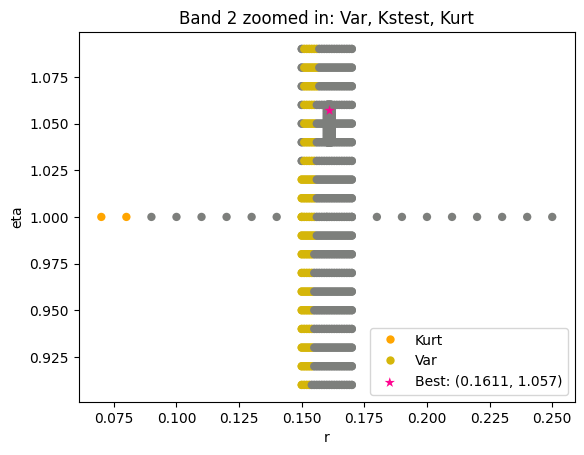

Band 5
(0.152, 0.69), 50 of 420
(0.154, 0.79), 100 of 420
(0.157, 0.69), 150 of 420
(0.159, 0.79), 200 of 420
(0.162, 0.69), 250 of 420
(0.164, 0.79), 300 of 420
(0.167, 0.69), 350 of 420
(0.169, 0.79), 400 of 420


100%|██████████| 420/420 [00:01<00:00, 309.94it/s]


Finding Minimum after computing 420 CDFs
Iter 1 band 5 best parameters: ((0.161, 0.76), 0.00925043363511302)
(0.1601, 0.761), 450 of 861
(0.1603, 0.769), 500 of 861
(0.1606, 0.756), 550 of 861
(0.1608, 0.764), 600 of 861
(0.1611, 0.754), 650 of 861
(0.1613, 0.762), 700 of 861
(0.1615, 0.77), 750 of 861
(0.1618, 0.757), 800 of 861
(0.162, 0.767), 850 of 861


100%|██████████| 852/852 [00:02<00:00, 309.88it/s]


Finding Minimum after computing 852 CDFs
Iter 2 band 5 best parameters: ((0.1612, 0.769), 0.00894878248896036)


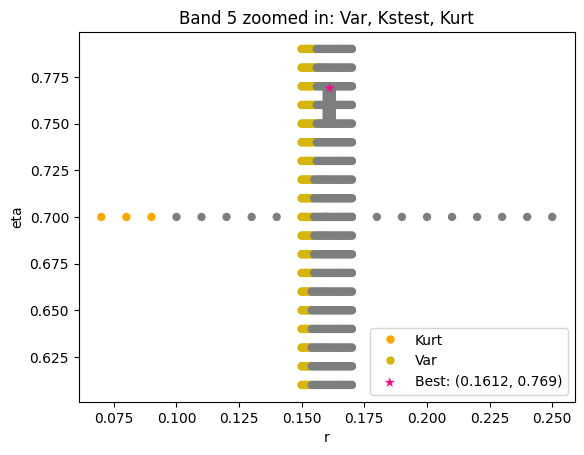

Band 8
(0.172, 1.47), 50 of 441
(0.174, 1.55), 100 of 441
(0.177, 1.42), 150 of 441
(0.179, 1.5), 200 of 441
(0.181, 1.58), 250 of 441
(0.184, 1.45), 300 of 441
(0.186, 1.53), 350 of 441
(0.189, 1.4), 400 of 441


100%|██████████| 441/441 [00:01<00:00, 310.05it/s]


Finding Minimum after computing 441 CDFs
Iter 1 band 8 best parameters: ((0.179, 1.42), 0.007579973554932451)
(0.178, 1.419), 450 of 882
(0.1782, 1.429), 500 of 882
(0.1785, 1.416), 550 of 882
(0.1787, 1.424), 600 of 882
(0.179, 1.412), 650 of 882
(0.1792, 1.422), 700 of 882
(0.1794, 1.43), 750 of 882
(0.1797, 1.417), 800 of 882
(0.1799, 1.425), 850 of 882


100%|██████████| 873/873 [00:02<00:00, 309.97it/s]


Finding Minimum after computing 873 CDFs
Iter 2 band 8 best parameters: ((0.1788, 1.416), 0.00737433265183618)


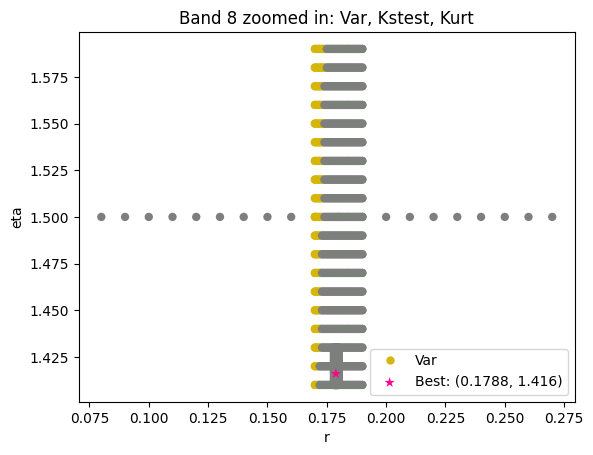

Band 11
(0.182, 1.67), 50 of 441
(0.184, 1.75), 100 of 441
(0.187, 1.62), 150 of 441
(0.189, 1.7), 200 of 441
(0.191, 1.78), 250 of 441
(0.194, 1.65), 300 of 441
(0.196, 1.73), 350 of 441
(0.199, 1.6), 400 of 441


100%|██████████| 441/441 [00:01<00:00, 309.98it/s]


Finding Minimum after computing 441 CDFs
Iter 1 band 11 best parameters: ((0.188, 1.65), 0.00581469512605981)
(0.187, 1.649), 450 of 882
(0.1872, 1.659), 500 of 882
(0.1875, 1.646), 550 of 882
(0.1877, 1.654), 600 of 882
(0.188, 1.642), 650 of 882
(0.1882, 1.652), 700 of 882
(0.1884, 1.66), 750 of 882
(0.1887, 1.647), 800 of 882
(0.1889, 1.655), 850 of 882


100%|██████████| 873/873 [00:02<00:00, 311.30it/s]


Finding Minimum after computing 873 CDFs
Iter 2 band 11 best parameters: ((0.1879, 1.646), 0.00575152575489557)


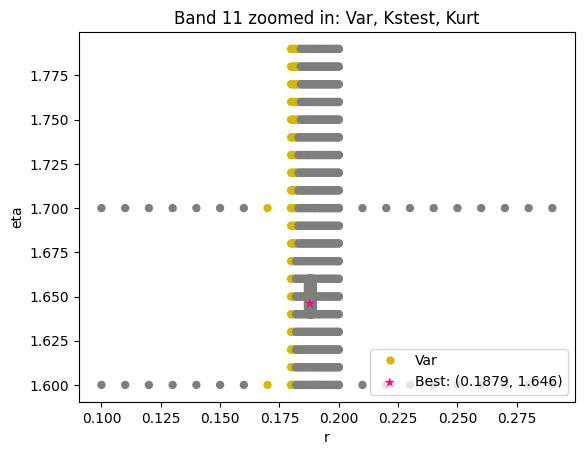

Band 14
(0.192, 1.97), 50 of 441
(0.194, 2.05), 100 of 441
(0.197, 1.92), 150 of 441
(0.199, 2.0), 200 of 441
(0.201, 2.08), 250 of 441
(0.204, 1.95), 300 of 441
(0.206, 2.03), 350 of 441
(0.209, 1.9), 400 of 441


100%|██████████| 441/441 [00:01<00:00, 309.51it/s]


Finding Minimum after computing 441 CDFs
Iter 1 band 14 best parameters: ((0.199, 1.93), 0.005437084078833476)
(0.198, 1.929), 450 of 882
(0.1982, 1.939), 500 of 882
(0.1985, 1.926), 550 of 882
(0.1987, 1.934), 600 of 882
(0.199, 1.922), 650 of 882
(0.1992, 1.932), 700 of 882
(0.1994, 1.94), 750 of 882
(0.1997, 1.927), 800 of 882
(0.1999, 1.935), 850 of 882


100%|██████████| 873/873 [00:02<00:00, 310.57it/s]


Finding Minimum after computing 873 CDFs
Iter 2 band 14 best parameters: ((0.1989, 1.922), 0.005266347579701791)


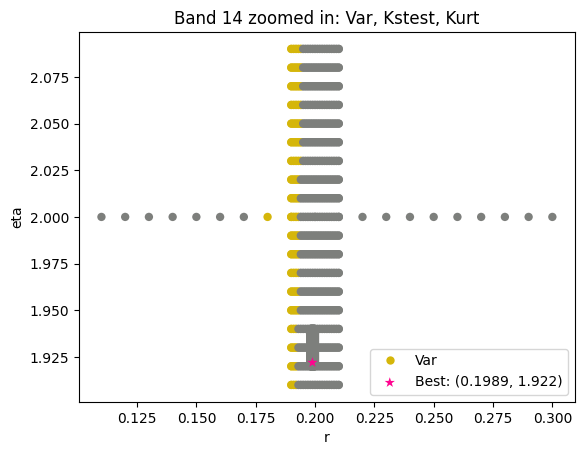

Band 17
(0.192, 1.47), 50 of 441
(0.194, 1.55), 100 of 441
(0.197, 1.42), 150 of 441
(0.199, 1.5), 200 of 441
(0.201, 1.58), 250 of 441
(0.204, 1.45), 300 of 441
(0.206, 1.53), 350 of 441
(0.209, 1.4), 400 of 441


100%|██████████| 441/441 [00:01<00:00, 309.49it/s]


Finding Minimum after computing 441 CDFs
Iter 1 band 17 best parameters: ((0.198, 1.44), 0.0038514892529949735)
(0.197, 1.439), 450 of 882
(0.1972, 1.449), 500 of 882
(0.1975, 1.436), 550 of 882
(0.1977, 1.444), 600 of 882
(0.198, 1.432), 650 of 882
(0.1982, 1.442), 700 of 882
(0.1984, 1.45), 750 of 882
(0.1987, 1.437), 800 of 882
(0.1989, 1.445), 850 of 882


100%|██████████| 873/873 [00:02<00:00, 310.69it/s]


Finding Minimum after computing 873 CDFs
Iter 2 band 17 best parameters: ((0.1977, 1.43), 0.0036861469360279647)


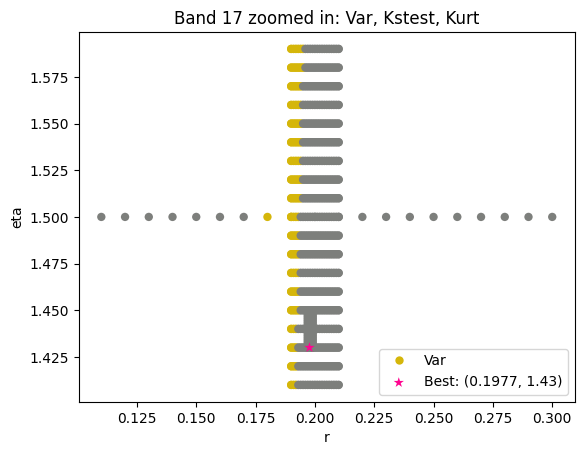

Band 20
(0.182, 0.69), 50 of 420
(0.184, 0.79), 100 of 420
(0.187, 0.69), 150 of 420
(0.189, 0.79), 200 of 420
(0.192, 0.69), 250 of 420
(0.194, 0.79), 300 of 420
(0.197, 0.69), 350 of 420
(0.199, 0.79), 400 of 420


100%|██████████| 420/420 [00:01<00:00, 310.08it/s]


Finding Minimum after computing 420 CDFs
Iter 1 band 20 best parameters: ((0.192, 0.79), 0.00512904422607896)
(0.1911, 0.79), 450 of 861
(0.1913, 0.798), 500 of 861
(0.1916, 0.785), 550 of 861
(0.1918, 0.793), 600 of 861
(0.1921, 0.782), 650 of 861
(0.1923, 0.79), 700 of 861
(0.1925, 0.798), 750 of 861
(0.1928, 0.785), 800 of 861
(0.193, 0.795), 850 of 861


100%|██████████| 855/855 [00:02<00:00, 310.86it/s]


Finding Minimum after computing 855 CDFs
Iter 2 band 20 best parameters: ((0.1923, 0.799), 0.004472023775482059)


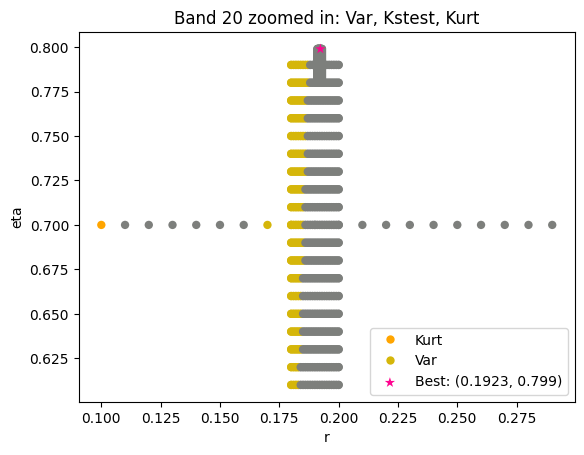

Band 23
(0.192, 0.59), 50 of 420
(0.194, 0.69), 100 of 420
(0.197, 0.59), 150 of 420
(0.199, 0.69), 200 of 420
(0.202, 0.59), 250 of 420
(0.204, 0.69), 300 of 420
(0.207, 0.59), 350 of 420
(0.209, 0.69), 400 of 420


100%|██████████| 420/420 [00:01<00:00, 308.47it/s]


Finding Minimum after computing 420 CDFs
Iter 1 band 23 best parameters: ((0.198, 0.59), 0.0055823931210214894)
(0.1971, 0.591), 450 of 861
(0.1973, 0.599), 500 of 861
(0.1976, 0.586), 550 of 861
(0.1978, 0.594), 600 of 861
(0.1981, 0.584), 650 of 861
(0.1983, 0.592), 700 of 861
(0.1985, 0.6), 750 of 861
(0.1988, 0.587), 800 of 861
(0.199, 0.597), 850 of 861


100%|██████████| 852/852 [00:02<00:00, 310.26it/s]


Finding Minimum after computing 852 CDFs
Iter 2 band 23 best parameters: ((0.1977, 0.58), 0.005469228044667873)


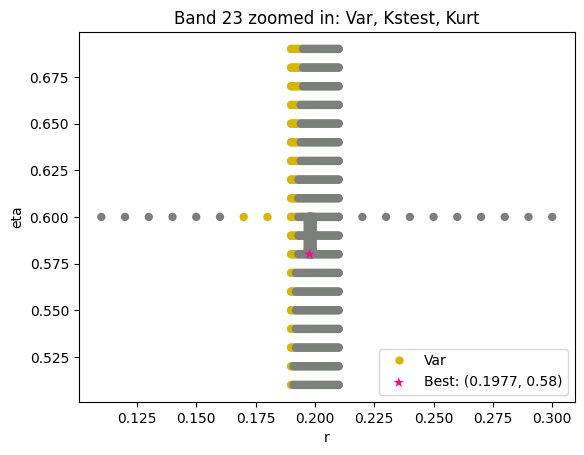

Band 26
(0.192, 0.09), 50 of 420
(0.194, 0.19), 100 of 420
(0.197, 0.09), 150 of 420
(0.199, 0.19), 200 of 420
(0.202, 0.09), 250 of 420
(0.204, 0.19), 300 of 420
(0.207, 0.09), 350 of 420
(0.209, 0.19), 400 of 420


100%|██████████| 420/420 [00:01<00:00, 309.22it/s]


Finding Minimum after computing 420 CDFs
Iter 1 band 26 best parameters: ((0.202, 0.16), 0.006254759583159464)
(0.2011, 0.161), 450 of 861
(0.2013, 0.169), 500 of 861
(0.2016, 0.156), 550 of 861
(0.2018, 0.164), 600 of 861
(0.2021, 0.154), 650 of 861
(0.2023, 0.162), 700 of 861
(0.2025, 0.17), 750 of 861
(0.2028, 0.157), 800 of 861
(0.203, 0.167), 850 of 861


100%|██████████| 852/852 [00:02<00:00, 299.68it/s]


Finding Minimum after computing 852 CDFs
Iter 2 band 26 best parameters: ((0.2016, 0.15), 0.006091973244805149)


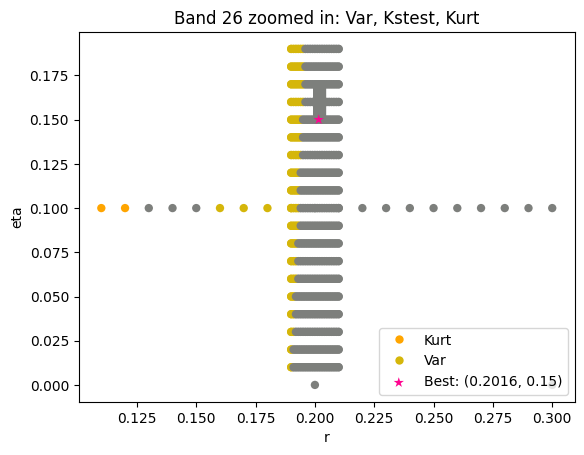

Band 29
(0.212, -0.23), 50 of 441
(0.214, -0.15), 100 of 441
(0.217, -0.28), 150 of 441
(0.219, -0.2), 200 of 441
(0.221, -0.12), 250 of 441
(0.224, -0.25), 300 of 441
(0.226, -0.17), 350 of 441
(0.229, -0.3), 400 of 441


100%|██████████| 441/441 [00:01<00:00, 310.05it/s]


Finding Minimum after computing 441 CDFs
Iter 1 band 29 best parameters: ((0.219, -0.23), 0.01007134625988576)
(0.218, -0.231), 450 of 882
(0.2182, -0.221), 500 of 882
(0.2185, -0.234), 550 of 882
(0.2187, -0.226), 600 of 882
(0.219, -0.238), 650 of 882
(0.2192, -0.228), 700 of 882
(0.2194, -0.22), 750 of 882
(0.2197, -0.233), 800 of 882
(0.2199, -0.225), 850 of 882


100%|██████████| 873/873 [00:02<00:00, 310.38it/s]


Finding Minimum after computing 873 CDFs
Iter 2 band 29 best parameters: ((0.2191, -0.228), 0.009940693334922646)


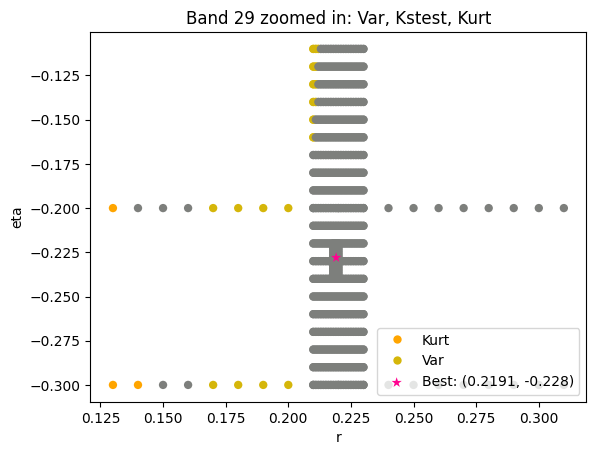

obs_var     var_lower     var_upper      obs_kurt  kurt_lower  \
band                                                                       
2     2.585050e+08  1.589284e+08  4.078819e+08    356.081580   99.133301   
5     1.529785e+08  8.631151e+07  3.112992e+08    813.590600  103.779987   
8     5.121678e+07  3.003023e+07  9.583304e+07    612.806126   92.325802   
11    3.090617e+07  1.261454e+07  1.278531e+08   5769.238912   83.057897   
14    1.055680e+07  5.359151e+06  3.458284e+07   2610.082854   75.710781   
17    6.451851e+06  2.578068e+06  3.393683e+07  11181.922646   65.416463   
20    3.491903e+06  1.486023e+06  1.712062e+07   6724.626660   70.291564   
23    1.724653e+06  5.911003e+05  1.148686e+07  16738.589621   63.702858   
26    1.045736e+06  1.697875e+05  1.057092e+07  32596.103697   71.612461   
29    1.118847e+05  2.123627e+04  9.043177e+05  26453.194976   91.602449   

       kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                            
2      600.444001        45000.0       0.16          1.0             0.010913   
5     2060.547926       117000.0       0.16          0.7             0.011256   
8     1727.800649       189000.0       0.18          1.5             0.008814   
11    6259.838704       495000.0       0.19          1.7             0.008397   
14    4860.044055      1134000.0       0.20          2.0             0.006294   
17    7685.503316      2574000.0       0.20          1.5             0.006467   
20    6708.684204      5967000.0       0.19          0.7             0.006697   
23    8285.556194     13887000.0       0.20          0.6             0.012452   
26    9318.730708     31968000.0       0.20          0.1             0.008531   
29    9072.576799     73701000.0       0.22         -0.2             0.013607   

      ...  best_r  best_eta  kstest_stat_best  iter1_r  iter1_eta  \
band  ...                                                           
2     ...  0.1611     1.057          0.009405    0.161       1.05   
5     ...  0.1612     0.769          0.008949    0.161       0.76   
8     ...  0.1788     1.416          0.007374    0.179       1.42   
11    ...  0.1879     1.646          0.005752    0.188       1.65   
14    ...  0.1989     1.922          0.005266    0.199       1.93   
17    ...  0.1977     1.430          0.003686    0.198       1.44   
20    ...  0.1923     0.799          0.004472    0.192       0.79   
23    ...  0.1977     0.580          0.005469    0.198       0.59   
26    ...  0.2016     0.150          0.006092    0.202       0.16   
29    ...  0.2191    -0.228          0.009941    0.219      -0.23   

      kstest_stat_iter1  iter2_r  iter2_eta  kstest_stat_iter2  n_pval_0.05  
band                                                                         
2              0.009576   0.1611      1.057           0.009405        21357  
5              0.009250   0.1612      0.769           0.008949        21937  
8              0.007580   0.1788      1.416           0.007374        35437  
11             0.005815   0.1879      1.646           0.005752        58729  
14             0.005437   0.1989      1.922           0.005266        67273  
17             0.003851   0.1977      1.430           0.003686       135736  
20             0.005129   0.1923      0.799           0.004472        93234  
23             0.005582   0.1977      0.580           0.005469        61026  
26             0.006255   0.2016      0.150           0.006092        50004  
29             0.010071   0.2191     -0.228           0.009941        17993  

[10 rows x 23 columns]

In [12]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

SKIP_OPTIMIZE_STEP = False
NUM_ITERS = dict(zip(GROUPS, [2]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if RERUN or not master_df_optimized_path.exists():
    if SKIP_OPTIMIZE_STEP:
        master_df['kstest_stat'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
    else:
        for group in GROUPS: 
            print(f"{GROUP.capitalize()} {group}")
            sample = group_data_map[group]
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            r_granularity = 10
            eta_granularity = 10
            for i in range(-1, -5, -1):
                if tuple([round_to_sigfigs(initial_r + 10.**i), initial_eta]) in all_cdfs:
                    r_granularity = 10.**i
                if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i)]) in all_cdfs:
                    
                    eta_granularity = 10.**i

            for d in range(1, NUM_ITERS[group] + 1):
                if d == 1:
                    initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
                else:
                    initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
                r_granularity = r_granularity * 10.0**(-d+1) 
                eta_granularity = eta_granularity * 10.0**(-d+1) 

                r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
                eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
                simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
                cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
                ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

                temp_df = create_kurt_var_ksstat_df(cdfs_dict)
                temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
                group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
                master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
                master_df.loc[group, 'kstest_stat_best'] = kstest_stat
                master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
                master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
                
                print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

            temp_df = group_cdf_df_dict[group]
            eps = 0.1
            filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                            (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                            (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                            (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(filtered_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', f'best_r', f'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

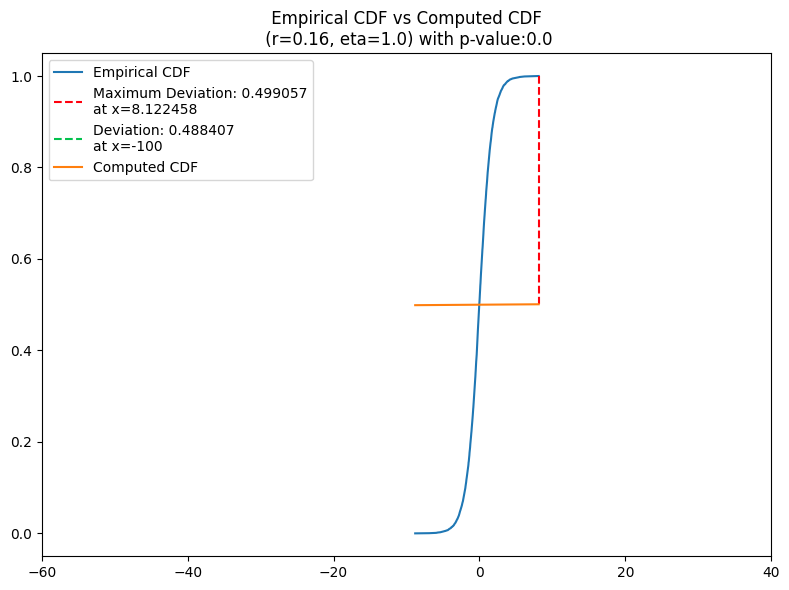

In [13]:
# Example Cell
group = 2
visualize_cdf(sample = sample_prior(1, 1, 10000), 
              all_cdfs = None, 
              params = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']),
              distro = 'gengamma',
              n_samples=200, 
              interval = (-60, 40), 
              provided_loc = -100);

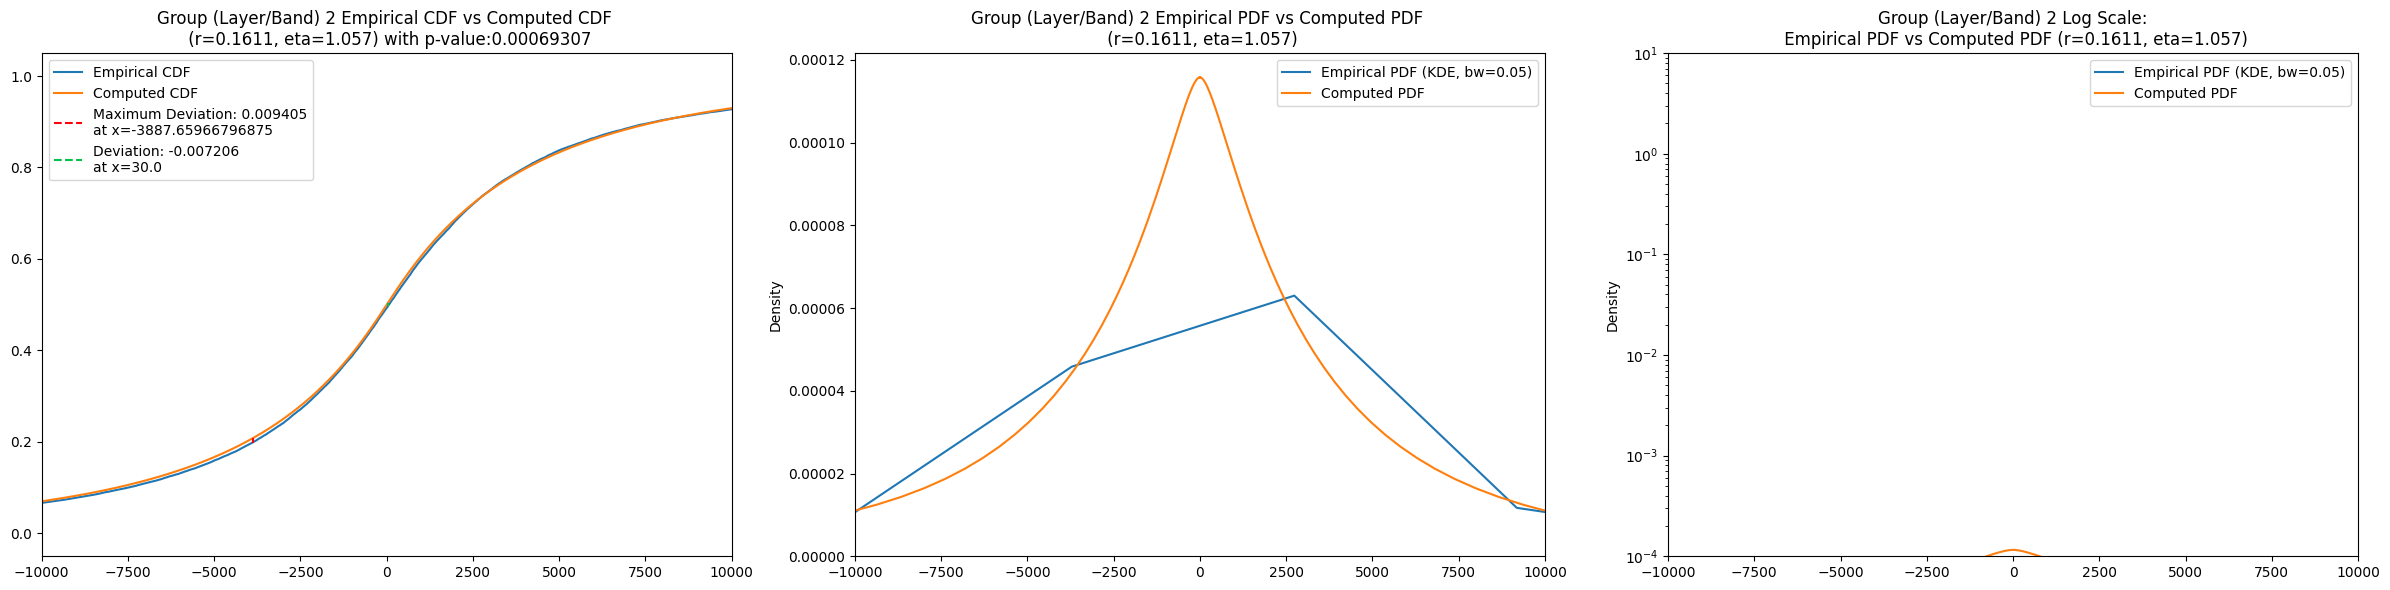

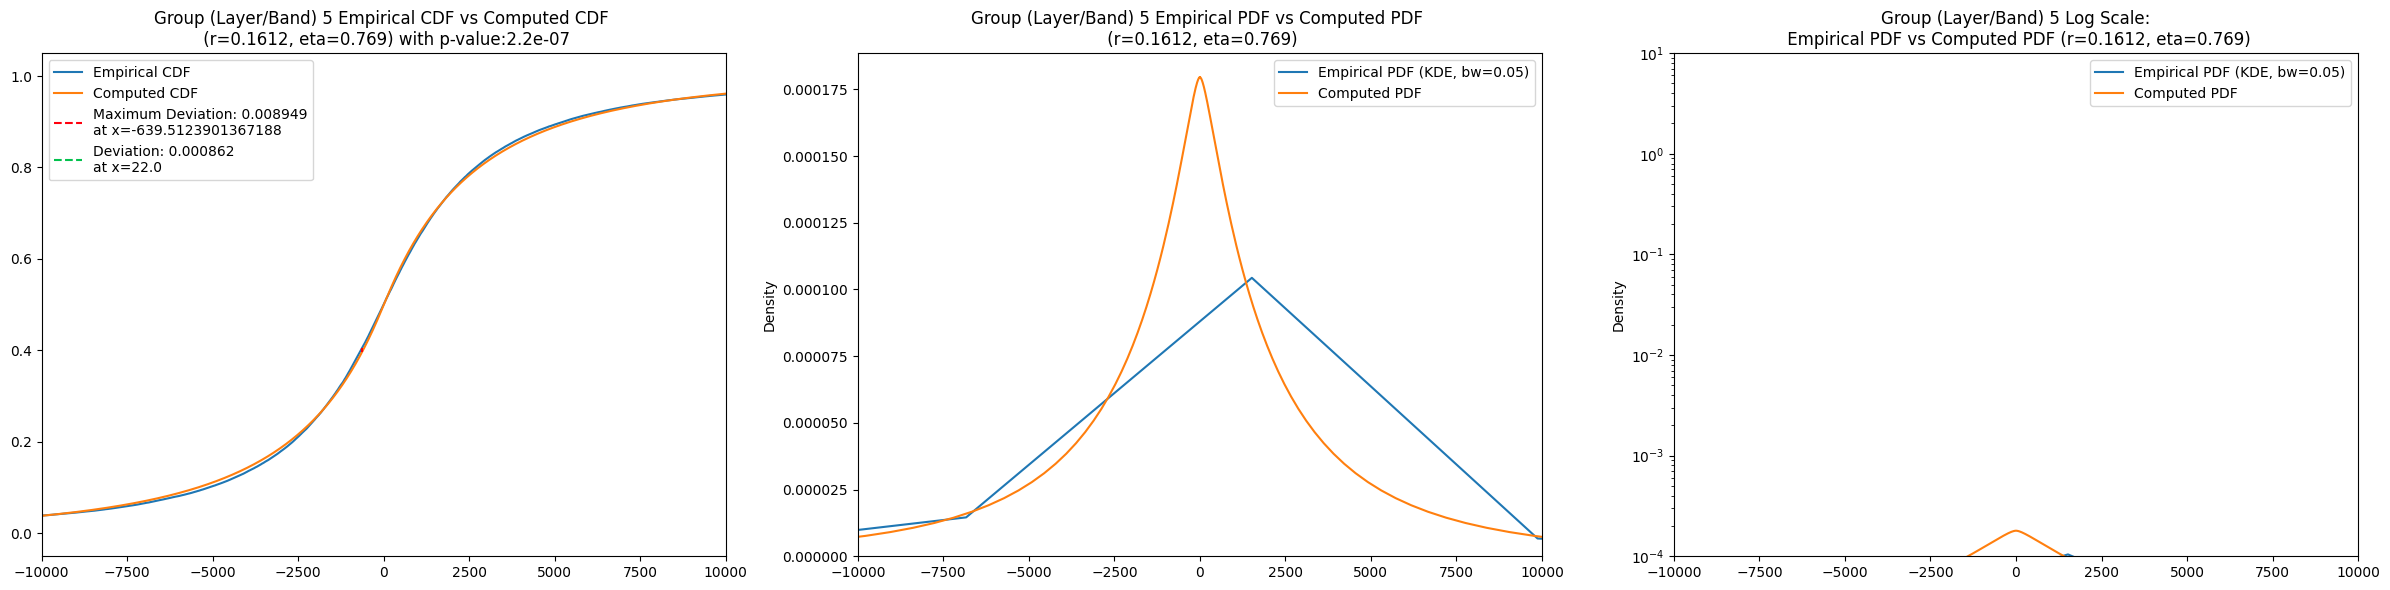

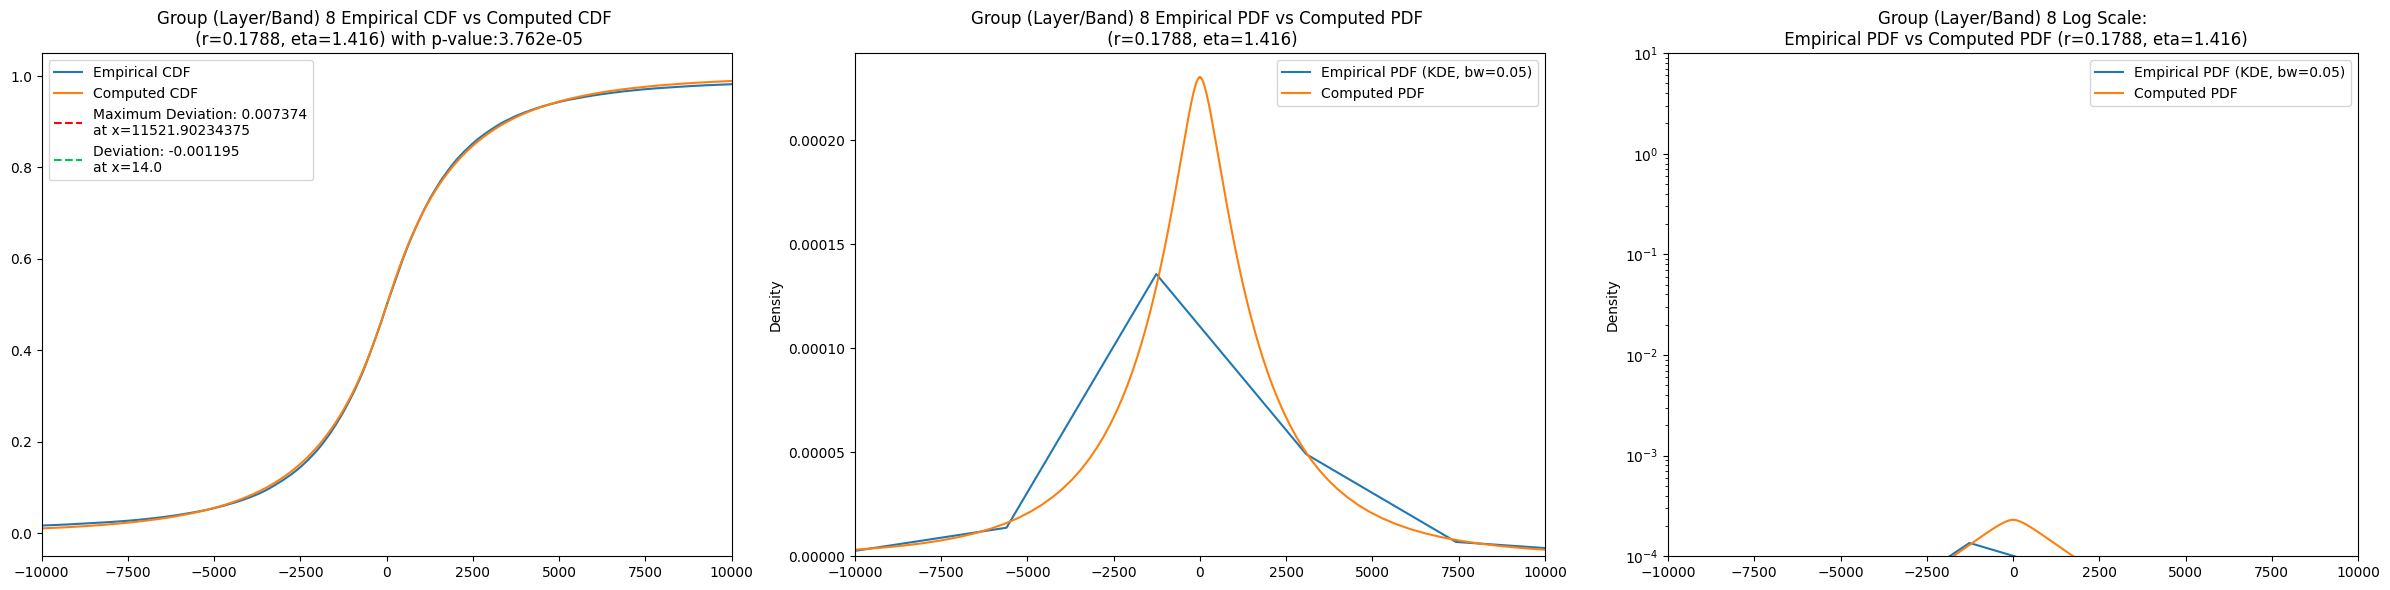

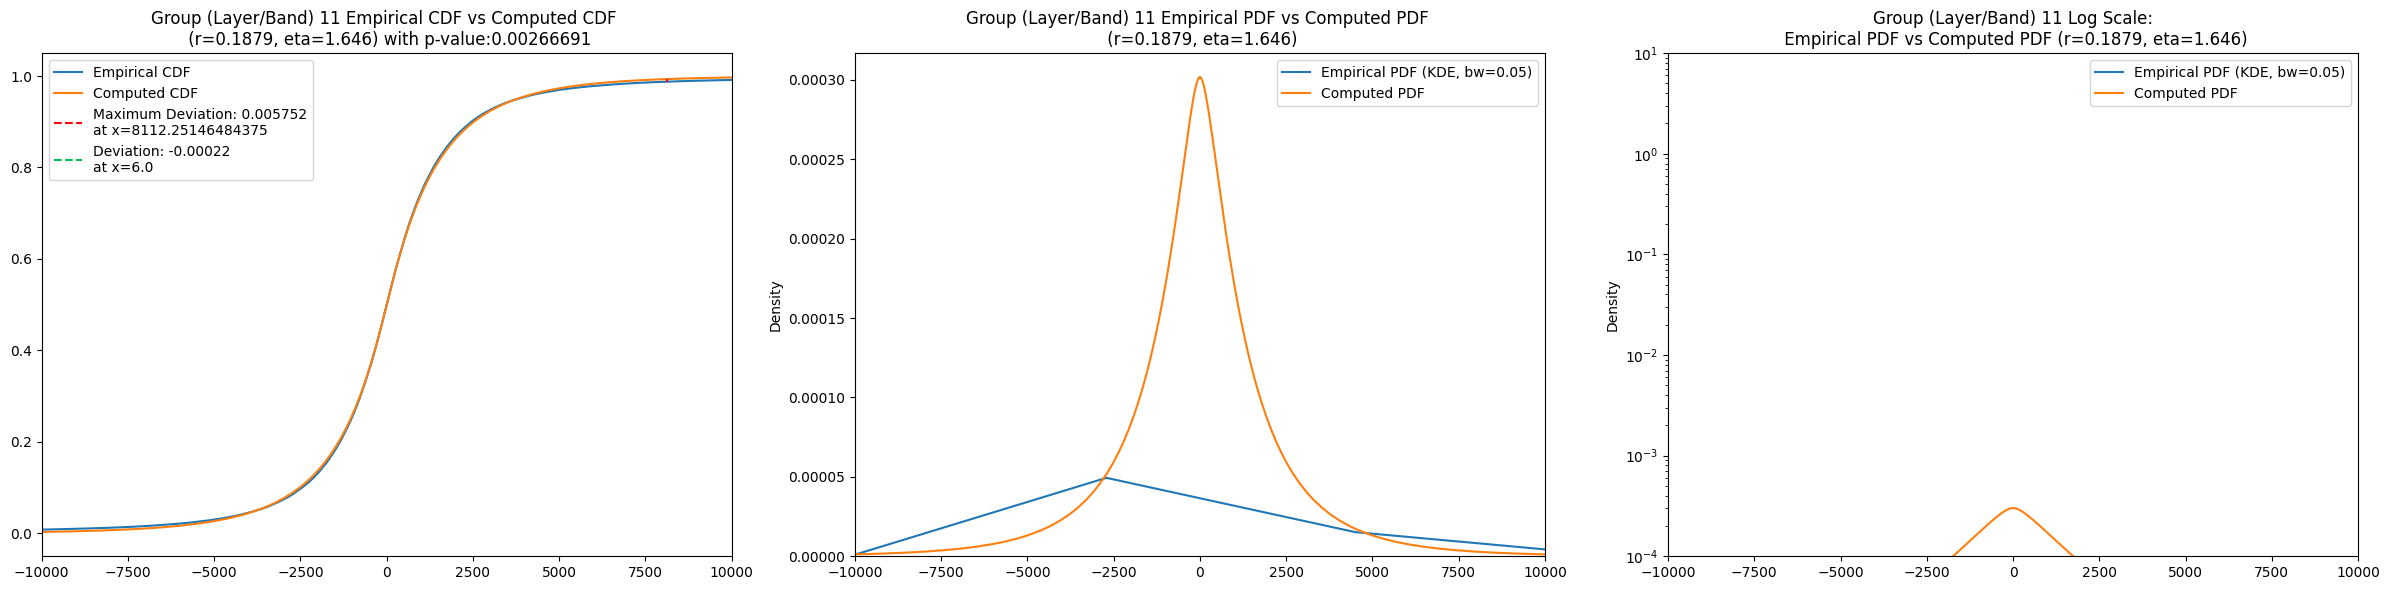

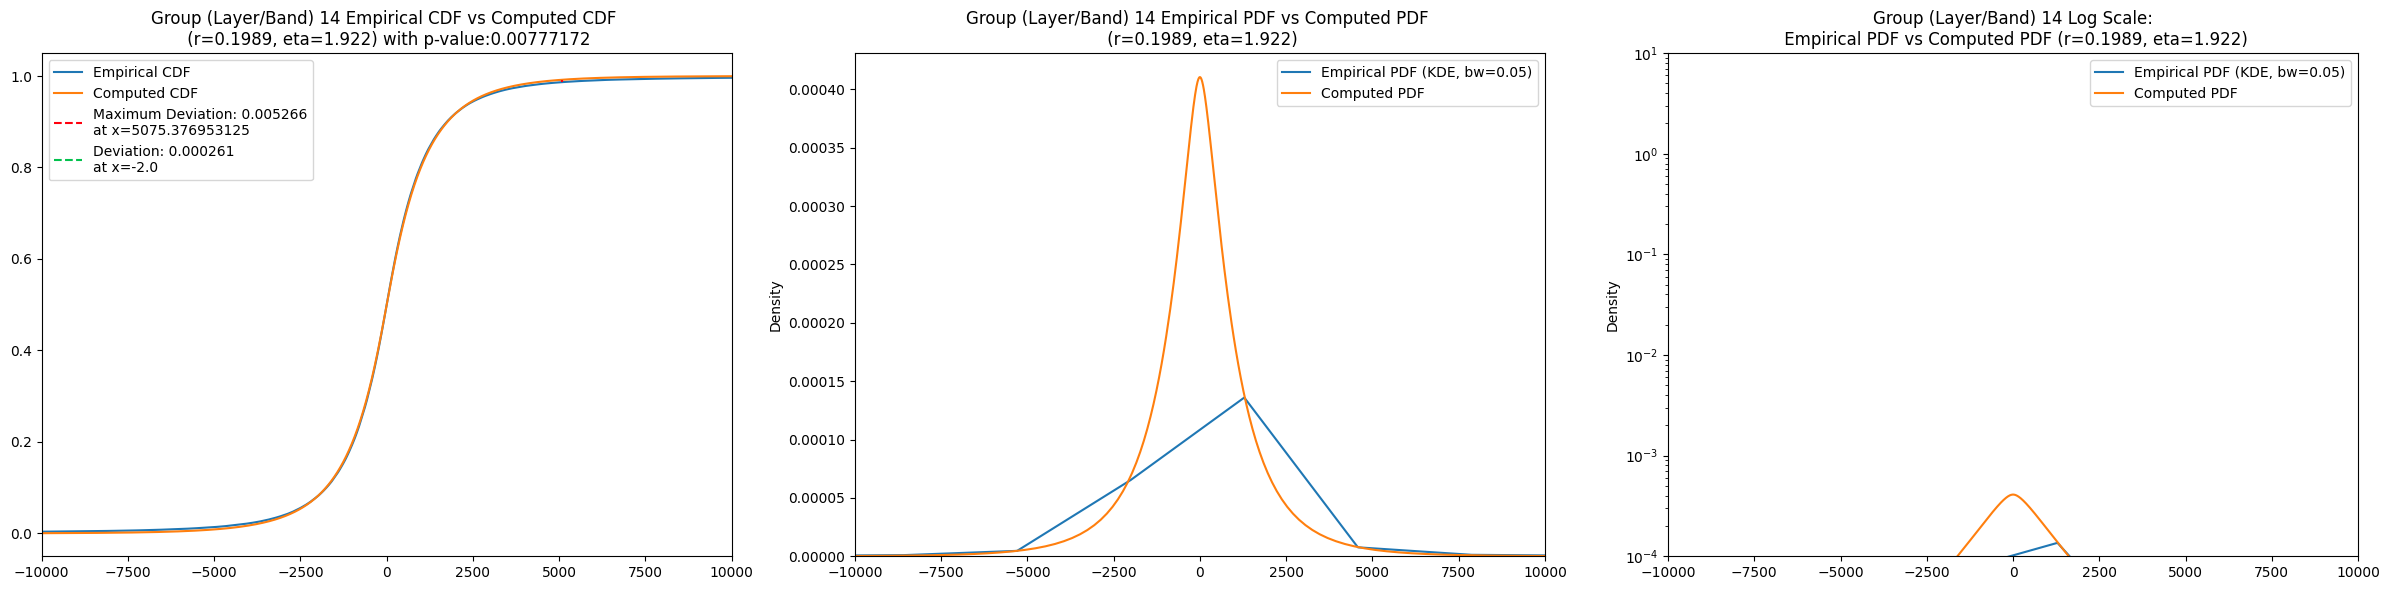

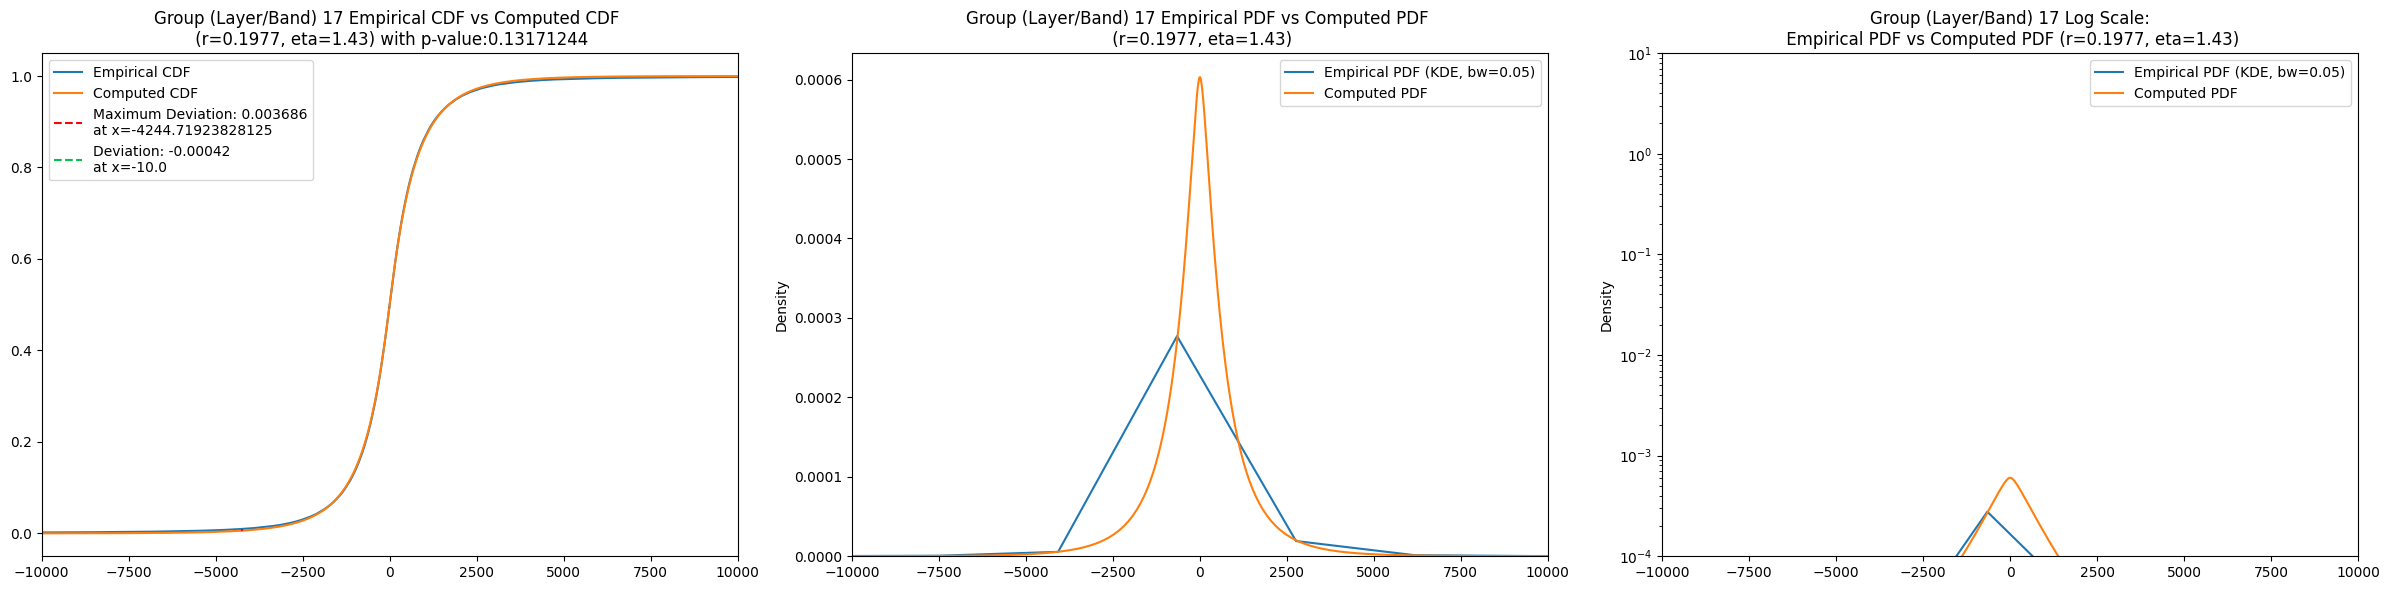

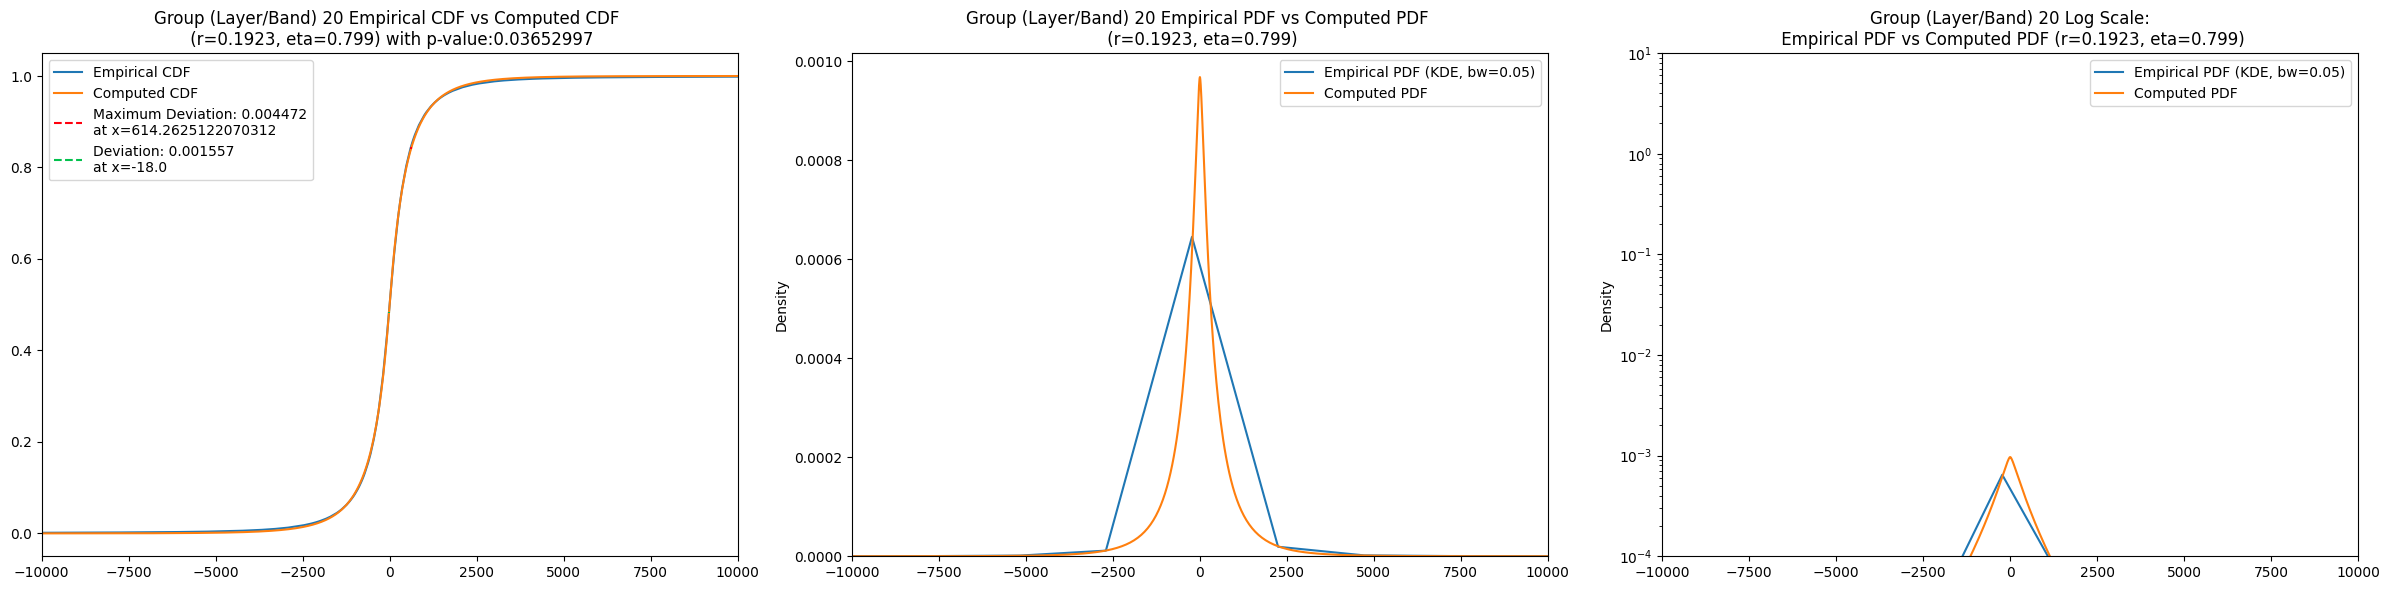

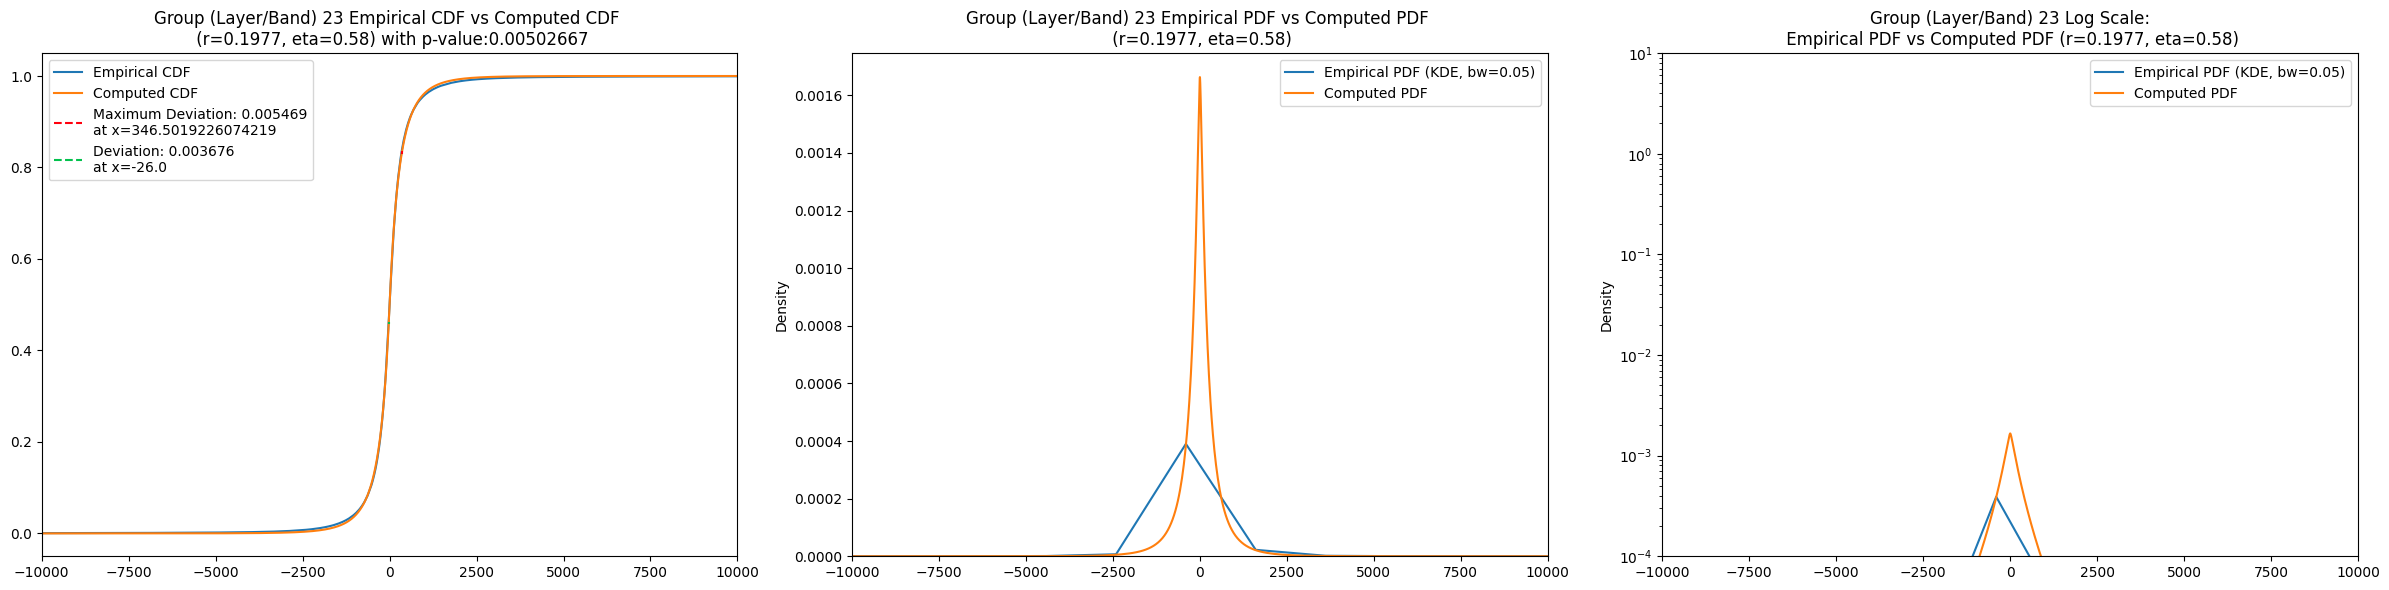

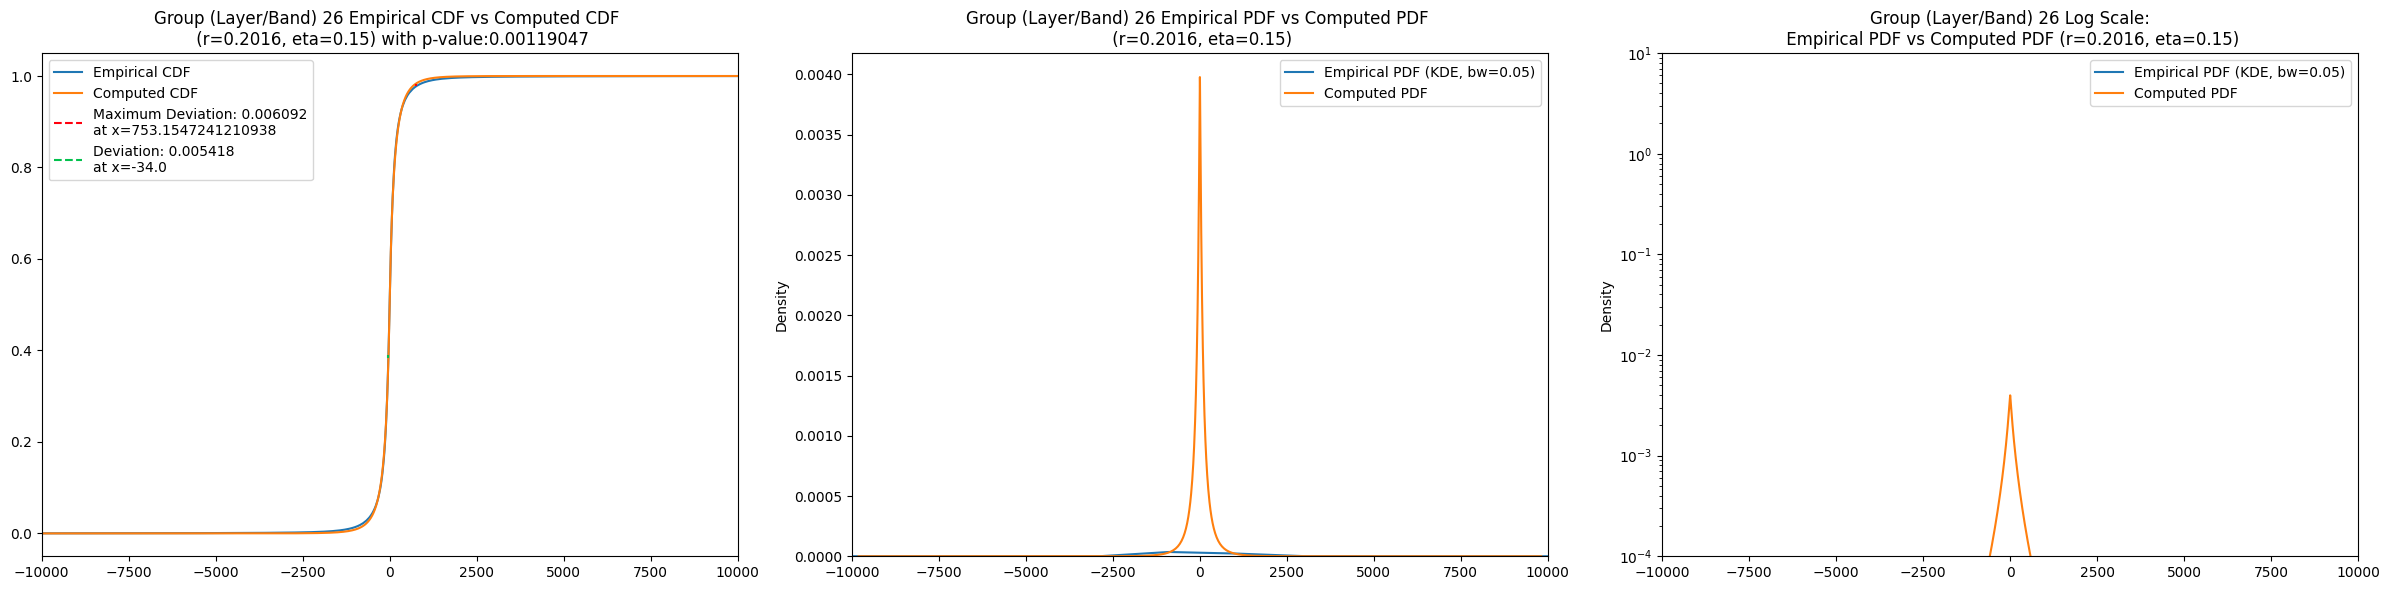

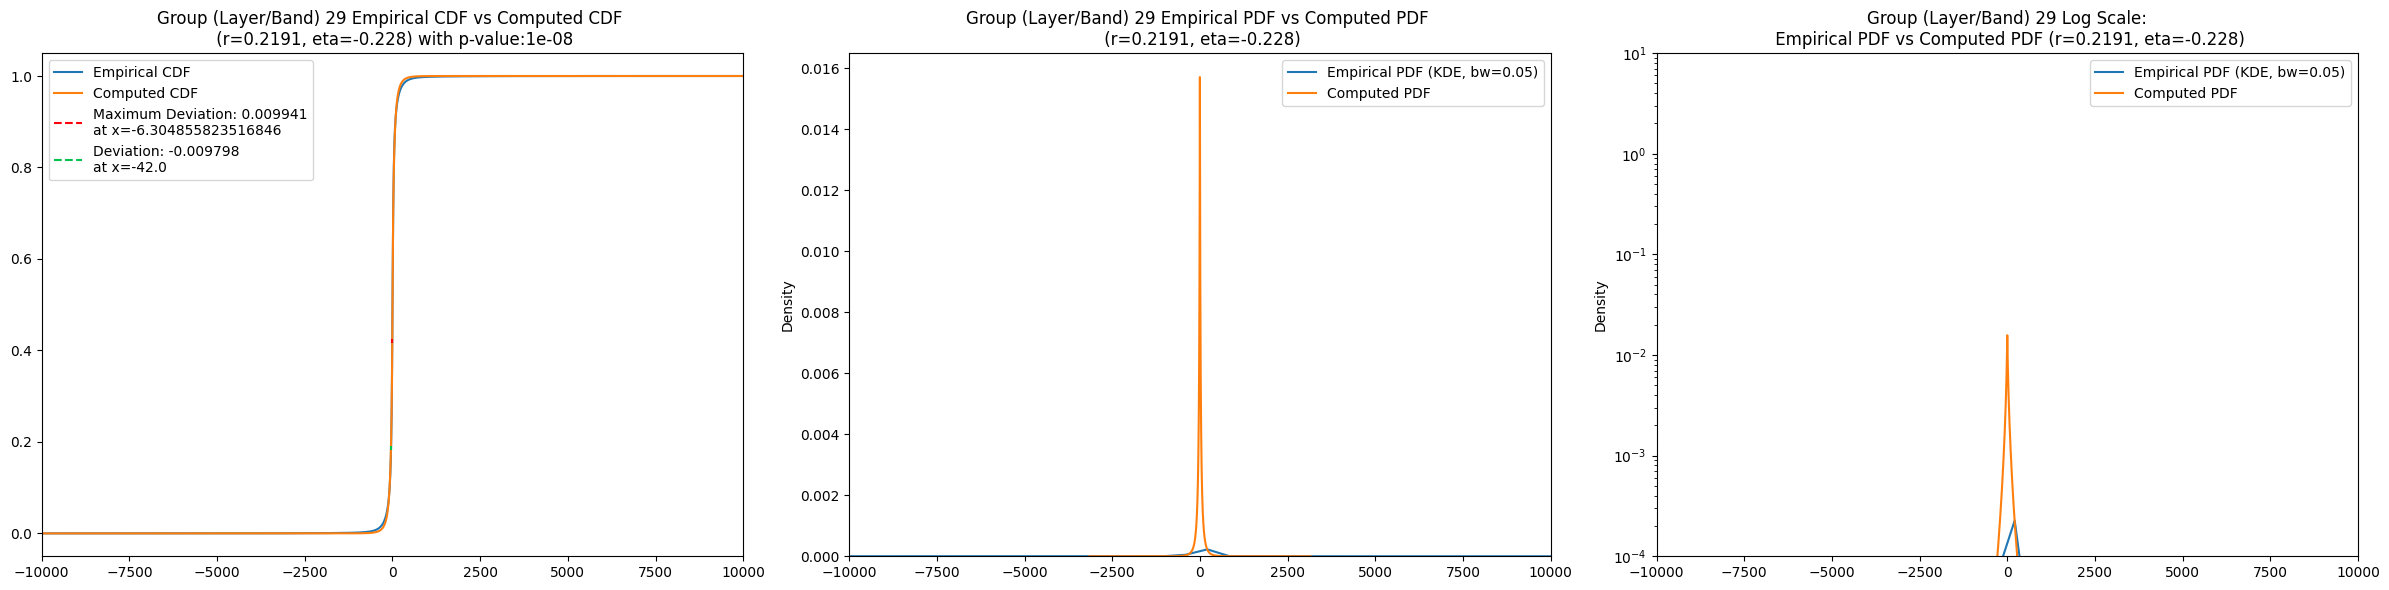

In [14]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    interval = (-10000, 10000), #(-(40 - group//3.1*15), (40 - group//3.1*15)),
                    provided_loc=(30 - group//3.1*8))
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

## Comparing with Gaussian and Laplace

In [15]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [16]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var     var_lower     var_upper      obs_kurt  kurt_lower  \
band                                                                       
2     2.585050e+08  1.589284e+08  4.078819e+08    356.081580   99.133301   
5     1.529785e+08  8.631151e+07  3.112992e+08    813.590600  103.779987   
8     5.121678e+07  3.003023e+07  9.583304e+07    612.806126   92.325802   
11    3.090617e+07  1.261454e+07  1.278531e+08   5769.238912   83.057897   
14    1.055680e+07  5.359151e+06  3.458284e+07   2610.082854   75.710781   
17    6.451851e+06  2.578068e+06  3.393683e+07  11181.922646   65.416463   
20    3.491903e+06  1.486023e+06  1.712062e+07   6724.626660   70.291564   
23    1.724653e+06  5.911003e+05  1.148686e+07  16738.589621   63.702858   
26    1.045736e+06  1.697875e+05  1.057092e+07  32596.103697   71.612461   
29    1.118847e+05  2.123627e+04  9.043177e+05  26453.194976   91.602449   

       kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                            
2      600.444001        45000.0       0.16          1.0             0.010913   
5     2060.547926       117000.0       0.16          0.7             0.011256   
8     1727.800649       189000.0       0.18          1.5             0.008814   
11    6259.838704       495000.0       0.19          1.7             0.008397   
14    4860.044055      1134000.0       0.20          2.0             0.006294   
17    7685.503316      2574000.0       0.20          1.5             0.006467   
20    6708.684204      5967000.0       0.19          0.7             0.006697   
23    8285.556194     13887000.0       0.20          0.6             0.012452   
26    9318.730708     31968000.0       0.20          0.1             0.008531   
29    9072.576799     73701000.0       0.22         -0.2             0.013607   

      ...  param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
band  ...                                                               
2     ...       5228.2500              0.045990          3.791820e-83   
5     ...       3625.8200              0.042807         9.710740e-187   
8     ...       2415.7200              0.037672         1.736350e-233   
11    ...       1768.9900              0.033941          0.000000e+00   
14    ...       1255.2300              0.032912          0.000000e+00   
17    ...        898.7480              0.034483          0.000000e+00   
20    ...        623.3150              0.039409          0.000000e+00   
23    ...        378.2960              0.042260          0.000000e+00   
26    ...        177.8760              0.047941          0.000000e+00   
29    ...         52.4803              0.055534          0.000000e+00   

      param_laplace  kstest_stat_laplace  kstest_pval_laplace    param_t  \
band                                                                       
2          4618.870             0.020005         4.487170e-16  3666.4500   
5          3210.700             0.018556         2.003500e-35  2556.8900   
8          2142.530             0.014049         7.833270e-33  1699.5800   
11         1566.510             0.010974         3.310420e-52  1254.9900   
14         1105.250             0.008823         4.143350e-77   896.8090   
17          790.984             0.009403        4.203400e-198   640.0720   
20          549.624             0.014132         0.000000e+00   441.6110   
23          334.470             0.017541         0.000000e+00   266.9490   
26          158.158             0.022784         0.000000e+00   124.7820   
29           46.780             0.030867         0.000000e+00    36.9039   

      kstest_stat_t  kstest_pval_t  kstest_pval_gengamma  
band                                                      
2          0.017295   4.016650e-12          6.930700e-04  
5          0.012588   1.560770e-16          1.445800e-08  
8          0.008674   8.835880e-13          2.352200e-09  
11         0.005896   2.258660e-15      

In [17]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

# Results

In [19]:
import pandas as pd
import git
from pathlib import Path
import os
DATA_NAME = 'batch0approx1e5-agriVision-fourier-gray'
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()

Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
CWD


master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)

In [20]:
master_df#.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


obs_var     var_lower     var_upper      obs_kurt  kurt_lower  \
band                                                                       
2     2.585050e+08  1.589284e+08  4.078819e+08    356.081580   99.133301   
5     1.529785e+08  8.631151e+07  3.112992e+08    813.590600  103.779987   
8     5.121678e+07  3.003023e+07  9.583304e+07    612.806126   92.325802   
11    3.090617e+07  1.261454e+07  1.278531e+08   5769.238912   83.057897   
14    1.055680e+07  5.359151e+06  3.458284e+07   2610.082854   75.710781   
17    6.451851e+06  2.578068e+06  3.393683e+07  11181.922646   65.416463   
20    3.491903e+06  1.486023e+06  1.712062e+07   6724.626660   70.291564   
23    1.724653e+06  5.911003e+05  1.148686e+07  16738.589621   63.702858   
26    1.045736e+06  1.697875e+05  1.057092e+07  32596.103697   71.612461   
29    1.118847e+05  2.123627e+04  9.043177e+05  26453.194976   91.602449   

       kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                            
2      600.444001        45000.0       0.16          1.0             0.010913   
5     2060.547926       117000.0       0.16          0.7             0.011256   
8     1727.800649       189000.0       0.18          1.5             0.008814   
11    6259.838704       495000.0       0.19          1.7             0.008397   
14    4860.044055      1134000.0       0.20          2.0             0.006294   
17    7685.503316      2574000.0       0.20          1.5             0.006467   
20    6708.684204      5967000.0       0.19          0.7             0.006697   
23    8285.556194     13887000.0       0.20          0.6             0.012452   
26    9318.730708     31968000.0       0.20          0.1             0.008531   
29    9072.576799     73701000.0       0.22         -0.2             0.013607   

      ...  param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
band  ...                                                               
2     ...       5228.2500              0.045990          3.791820e-83   
5     ...       3625.8200              0.042807         9.710740e-187   
8     ...       2415.7200              0.037672         1.736350e-233   
11    ...       1768.9900              0.033941          0.000000e+00   
14    ...       1255.2300              0.032912          0.000000e+00   
17    ...        898.7480              0.034483          0.000000e+00   
20    ...        623.3150              0.039409          0.000000e+00   
23    ...        378.2960              0.042260          0.000000e+00   
26    ...        177.8760              0.047941          0.000000e+00   
29    ...         52.4803              0.055534          0.000000e+00   

      param_laplace  kstest_stat_laplace  kstest_pval_laplace    param_t  \
band                                                                       
2          4618.870             0.020005         4.487170e-16  3666.4500   
5          3210.700             0.018556         2.003500e-35  2556.8900   
8          2142.530             0.014049         7.833270e-33  1699.5800   
11         1566.510             0.010974         3.310420e-52  1254.9900   
14         1105.250             0.008823         4.143350e-77   896.8090   
17          790.984             0.009403        4.203400e-198   640.0720   
20          549.624             0.014132         0.000000e+00   441.6110   
23          334.470             0.017541         0.000000e+00   266.9490   
26          158.158             0.022784         0.000000e+00   124.7820   
29           46.780             0.030867         0.000000e+00    36.9039   

      kstest_stat_t  kstest_pval_t  kstest_pval_gengamma  
band                                                      
2          0.017295   4.016650e-12          6.930700e-04  
5          0.012588   1.560770e-16          1.445800e-08  
8          0.008674   8.835880e-13          2.352200e-09  
11         0.005896   2.258660e-15      